In [1]:
import pandas as pd

In [64]:
test = pd.read_csv('/home/coder/Downloads/titanic/test.csv')
train = pd.read_csv('/home/coder/Downloads/titanic/train.csv')

In [3]:
train.shape

(891, 12)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
#we can Drop the Name, Embarked columns since they will play an important role in our our predection algorithm
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#import sys
#!{sys.executable} -m pip install seaborn

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set() # setting seaborn default for plots

In [9]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

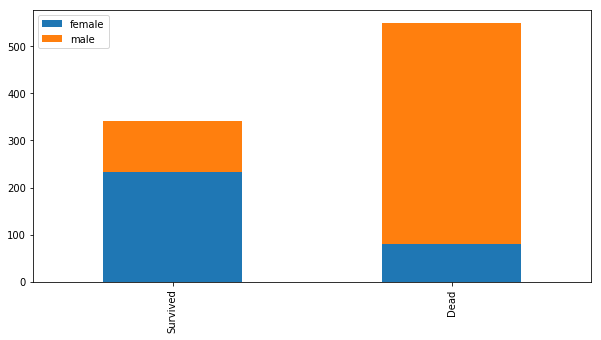

In [21]:
bar_chart('Sex')

In [66]:
#filling missing ages using median of the ages

train["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("median"), inplace=True)


In [67]:
train.info() #here we can see the missing values of ages have been filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [68]:
#Now making categories of Ages for ploting
train_and_test = [train,test] #combingin train and test data
#child: 0 (0 - 16)
#teen: 1 (17 - 26)
#adult: 2 (27 - 36)
#middle-age :3 (37 - 46)
#senior: 4 (>47)
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] >36) &(dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    
#print(train_and_test)

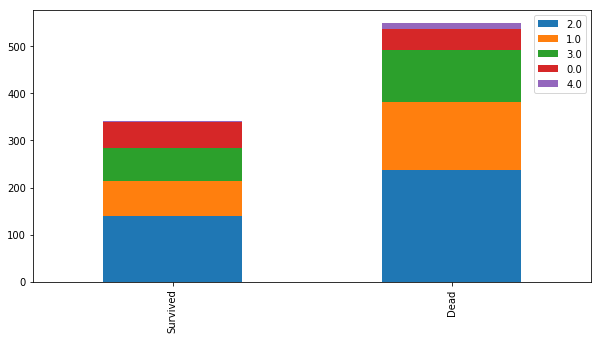

In [70]:
bar_chart('Age')

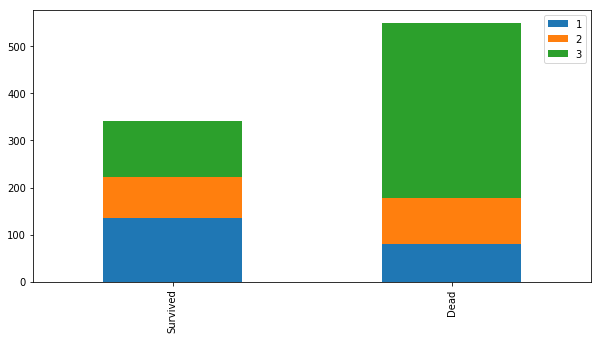

In [71]:
bar_chart('Pclass')